# 1. Prepare environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from datetime import datetime
from pandarallel import pandarallel
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import iplot

In [2]:
columns = [
    "Transaction unique identifier",
    "Price",
    "Date of Transfer",
    "Postcode",
    "Property Type",
    "Old/New",
    "Duration",
    "PAON",
    "SAON",
    "Street",
    "Locality",
    "Town/City",
    "District",
    "County",
    "PPD Category Type",
    "Record Status"
]

df_all = pd.read_csv("pp-complete.csv", header=None, names=columns)


print(df_all.shape)

(30906560, 16)


In [3]:
hp = df_all.copy()
hp.describe()

,Price
count,3.090656e+07
mean,2.340112e+05
std,9.811538e+05
min,1.000000e+00
25%,8.875000e+04
50%,1.575000e+05
75%,2.620000e+05
max,9.000000e+08


In [4]:
hp.head(5)

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status
0,{2A289E9F-6BB5-CDC8-E050-A8C063054829},36995,1995-03-24 00:00,SE19 3NF,F,N,L,CROWN POINT,14,BEULAH HILL,NaN,LONDON,CROYDON,GREATER LONDON,A,A
1,{2A289E9F-6BBA-CDC8-E050-A8C063054829},25000,1995-03-31 00:00,E16 1LG,F,N,L,9,NaN,POLLARD CLOSE,NaN,LONDON,NEWHAM,GREATER LONDON,A,A
2,{2A289E9F-6BC5-CDC8-E050-A8C063054829},25500,1995-05-17 00:00,EN3 6EA,F,N,L,33,NaN,BRIDLE CLOSE,NaN,ENFIELD,ENFIELD,GREATER LONDON,A,A
3,{2A289E9F-7DE9-CDC8-E050-A8C063054829},42000,1995-04-21 00:00,N13 4RS,T,N,L,87,NaN,RUSSELL ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
4,{2A289E9F-7DF0-CDC8-E050-A8C063054829},43000,1995-06-30 00:00,RM10 7NU,T,N,F,45,NaN,BOSWORTH ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A,A


In [5]:
hp['Price'].describe()

count    3.090656e+07
mean     2.340112e+05
std      9.811538e+05
min      1.000000e+00
25%      8.875000e+04
50%      1.575000e+05
75%      2.620000e+05
max      9.000000e+08
Name: Price, dtype: float64

In [6]:
hp.count()

Transaction unique identifier    30906560
Price                            30906560
Date of Transfer                 30906560
Postcode                         30856185
Property Type                    30906560
Old/New                          30906560
Duration                         30906560
PAON                             30902376
SAON                              3694165
Street                           30415231
Locality                         19196823
Town/City                        30906560
District                         30906560
County                           30906560
PPD Category Type                30906560
Record Status                    30906560
dtype: int64

In [7]:
hp.info()

<class 'pandas.DataFrame'>
RangeIndex: 30906560 entries, 0 to 30906559
Data columns (total 16 columns):
 #   Column                         Dtype
---  ------                         -----
 0   Transaction unique identifier  str  
 1   Price                          int64
 2   Date of Transfer               str  
 3   Postcode                       str  
 4   Property Type                  str  
 5   Old/New                        str  
 6   Duration                       str  
 7   PAON                           str  
 8   SAON                           str  
 9   Street                         str  
 10  Locality                       str  
 11  Town/City                      str  
 12  District                       str  
 13  County                         str  
 14  PPD Category Type              str  
 15  Record Status                  str  
dtypes: int64(1), str(15)
memory usage: 3.7 GB


In [8]:
feat_cols = hp.columns
feat_cols

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Postcode', 'Property Type', 'Old/New', 'Duration', 'PAON', 'SAON',
       'Street', 'Locality', 'Town/City', 'District', 'County',
       'PPD Category Type', 'Record Status'],
      dtype='str')

# 2. Data cleansing - PART 1

## 2.1 check null value

In [9]:
hp.isnull().sum()

Transaction unique identifier           0
Price                                   0
Date of Transfer                        0
Postcode                            50375
Property Type                           0
Old/New                                 0
Duration                                0
PAON                                 4184
SAON                             27212395
Street                             491329
Locality                         11709737
Town/City                               0
District                                0
County                                  0
PPD Category Type                       0
Record Status                           0
dtype: int64

In [10]:
hp = hp.dropna()

In [11]:
hp.isnull().sum()

Transaction unique identifier    0
Price                            0
Date of Transfer                 0
Postcode                         0
Property Type                    0
Old/New                          0
Duration                         0
PAON                             0
SAON                             0
Street                           0
Locality                         0
Town/City                        0
District                         0
County                           0
PPD Category Type                0
Record Status                    0
dtype: int64

## 2.2 Drop irrelevant features

In [12]:
hp.drop(columns='Transaction unique identifier', inplace=True)
hp.drop(columns='PPD Category Type', inplace=True)
hp.drop(columns='Record Status', inplace=True)
hp.drop(columns='PAON', inplace=True)
hp.drop(columns='SAON', inplace=True)
hp.drop(columns='Postcode', inplace=True)

hp.head()


,Price,Date of Transfer,Property Type,Old/New,Duration,Street,Locality,Town/City,District,County
117,36500,1995-06-09 00:00,F,N,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL
138,74000,1995-01-12 00:00,F,Y,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY
143,13000,1995-04-07 00:00,F,N,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT
150,29950,1995-03-31 00:00,F,N,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH
174,26500,1995-12-11 00:00,F,N,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON


## 2.3 Initialize parallel processing for better performance

In [13]:
pandarallel.initialize()

hp['Date of Transfer'] = hp['Date of Transfer'].parallel_apply(lambda x : x.split(' ')[0]) 

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


## 2.4 Transform the Date of Transfer to an appropriate format

In [14]:
hp['Year'] = hp['Date of Transfer'].str[:4]

hp['Date of Transfer'].iloc[1].split(" ")[0]
hp['Date of Transfer'] = pd.to_datetime(hp['Date of Transfer'], format='%Y-%m-%d', errors='coerce')
hp['Year'] = hp['Date of Transfer'].dt.year
hp['Month'] = hp['Date of Transfer'].dt.month

## 2.5 Remove O from Property Type feature

In [15]:
hp[hp['Property Type'] == 'O'].count()

Price               25959
Date of Transfer    25959
Property Type       25959
Old/New             25959
Duration            25959
Street              25959
Locality            25959
Town/City           25959
District            25959
County              25959
Year                25959
Month               25959
dtype: int64

In [16]:
hp = hp[hp['Property Type'] != 'O'].copy()

In [17]:
hp.head()

,Price,Date of Transfer,Property Type,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month
117,36500,1995-06-09,F,N,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6
138,74000,1995-01-12,F,Y,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1
143,13000,1995-04-07,F,N,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4
150,29950,1995-03-31,F,N,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3
174,26500,1995-12-11,F,N,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12


# 3. Explatory Data Analysis

## 3.1 Number of cities

In [18]:
print('Number of cities:', hp['Town/City'].nunique())

Number of cities: 1118


## 3.2 Number of recorded transactions per town (London, York and Burnley)

In [19]:
print("Recorded transactions in London:", hp[hp['Town/City'] == 'LONDON']['Price'].count())
print("Recorded transactions in York:", hp[hp['Town/City'] == 'YORK']['Price'].count())
print("Recorded transactions in Burnley:", hp[hp['Town/City'] == 'BURNLEY']['Price'].count())

Recorded transactions in London: 364855
Recorded transactions in York: 6157
Recorded transactions in Burnley: 408


## 3.3 Average, Minimum and Maximum property price per year

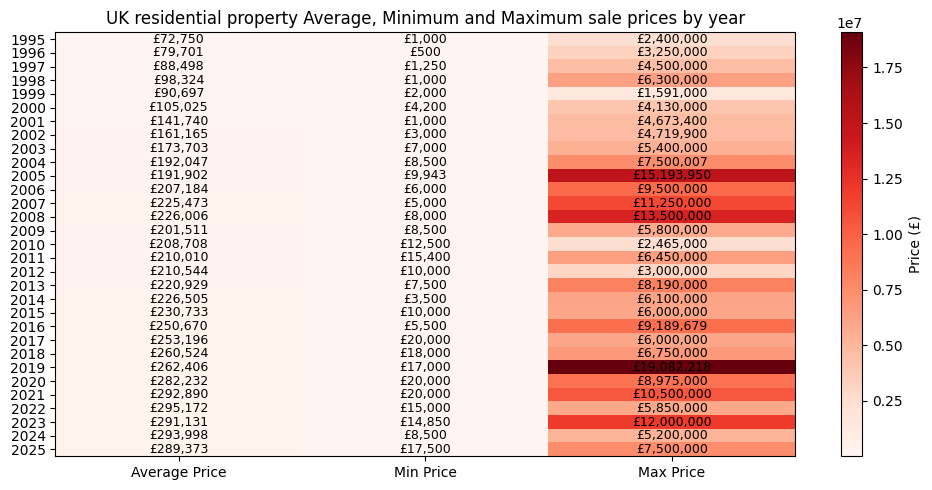

In [20]:
import matplotlib.pyplot as plt
import numpy as np

summary = (
    hp.groupby('Year')['Price']
      .agg(Avg_Price='mean', Min_Price='min', Max_Price='max')
      .reset_index()
      .set_index('Year')
)

data = summary.values

fig, ax = plt.subplots(figsize=(10, 5))

im = ax.imshow(data, aspect='auto', cmap='Reds')

# Labels
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Average Price', 'Min Price', 'Max Price'])
ax.set_yticks(np.arange(len(summary.index)))
ax.set_yticklabels(summary.index.astype(int))

# Add numbers inside cells
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f"£{data[i, j]:,.0f}",
                ha="center", va="center", fontsize=9, color="black")

plt.colorbar(im, ax=ax, label='Price (£)')
plt.title("UK residential property Average, Minimum and Maximum sale prices by year")
plt.tight_layout()
plt.show()


## 3.4 Price variations per year for London, York and Burnley

Text(0.5, 1.05, 'Price variations per year for London, York and Burnley')

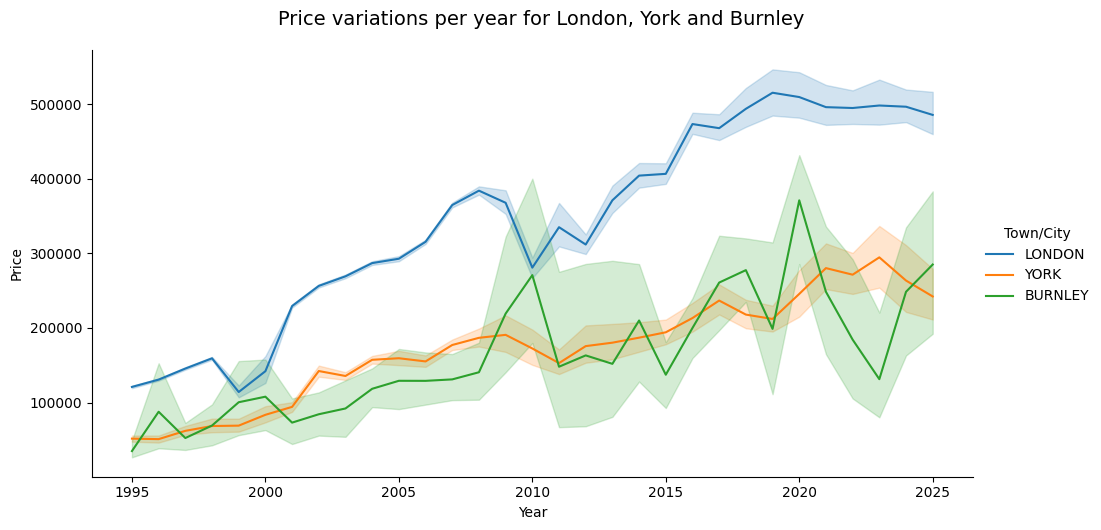

In [21]:
london_df = hp[hp['Town/City'] == 'LONDON'].copy()
york_df = hp[hp['Town/City'] == 'YORK'].copy()
burnley_df = hp[hp['Town/City'] == 'BURNLEY'].copy()
merged_cities_df = pd.concat([london_df, york_df, burnley_df]) # Merge three cities data into one dataset

import seaborn as sns

g = sns.relplot(
    kind='line',
    data=merged_cities_df,
    x='Year',
    y='Price',
    hue='Town/City',
    aspect=2
)

g.fig.suptitle("Price variations per year for London, York and Burnley", fontsize=14, y=1.05)


## 3.5 Top 50 most valued Towns on basis of investments done

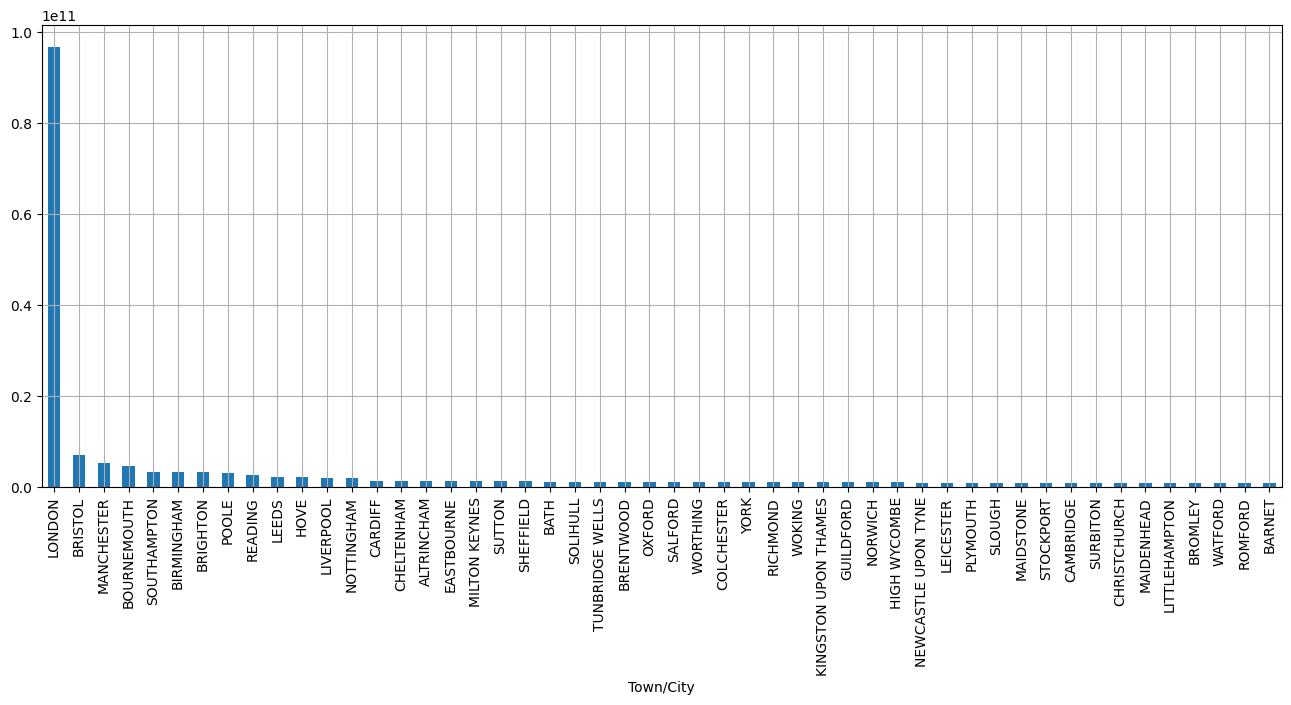

In [22]:
hp.groupby(hp['Town/City'])['Price'].sum().sort_values(ascending = False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));

## 3.6 Top 50 most valued Towns on basis of investments done (median value)

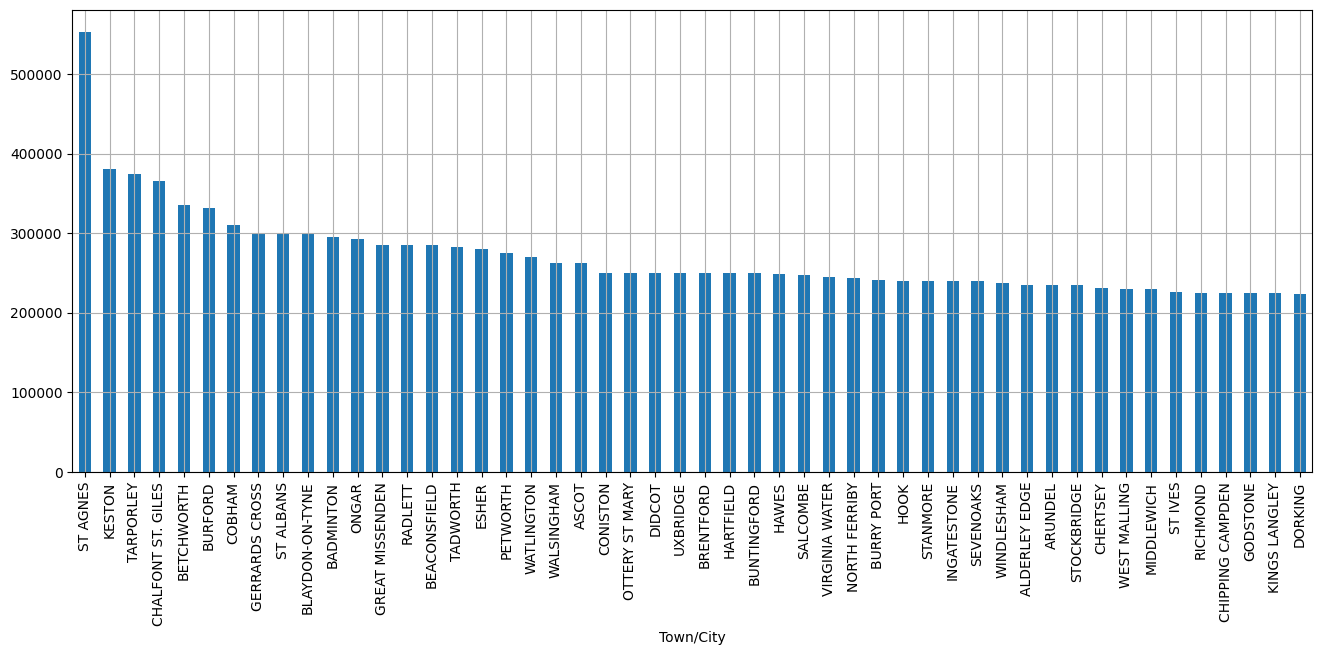

In [23]:
hp.groupby(hp['Town/City'])['Price'].median().sort_values(ascending = False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));

## 3.7 Top 50 most valued Towns based on 'NEW' investments done

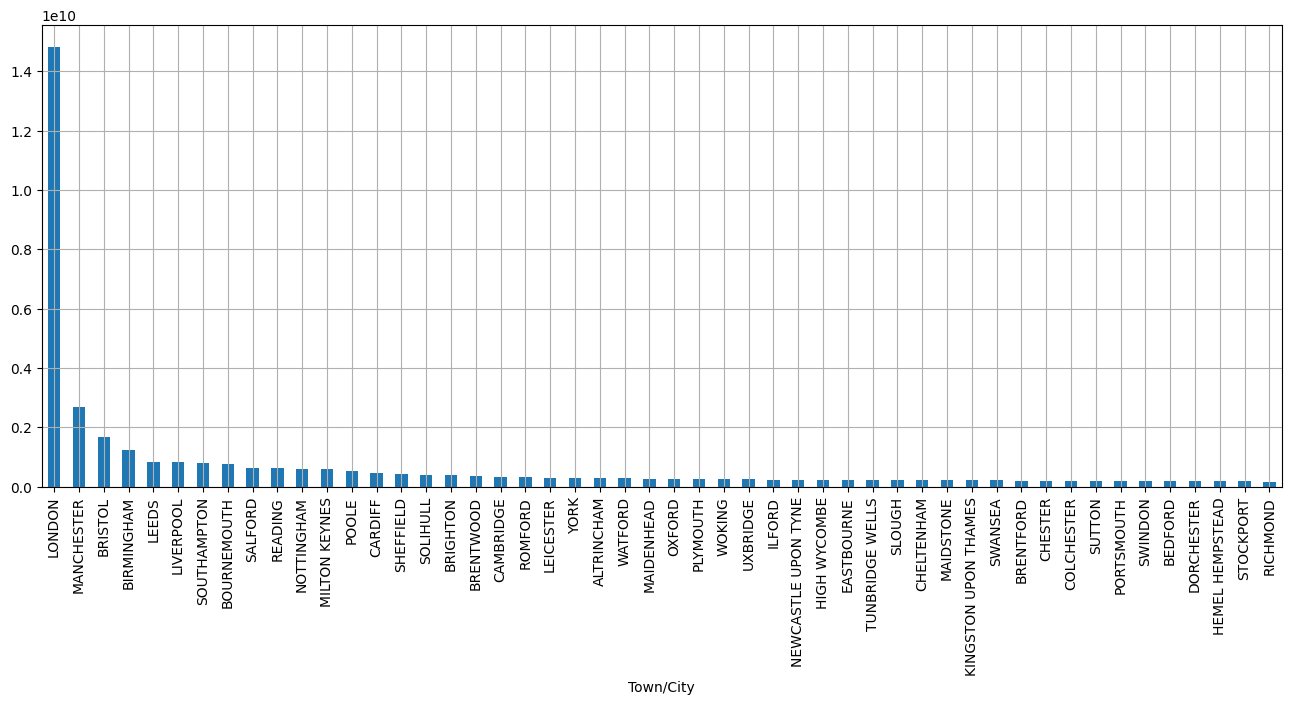

In [24]:
new_properties_df = hp[hp['Old/New'] == 'Y']

new_properties_df.groupby(new_properties_df['Town/City'])['Price'].sum().sort_values(ascending=False)[:50].plot(
    kind = "bar", grid = True, figsize = (16,6));

## 3.8 Top 50 most valued Towns based on 'NEW' investments done (median value)

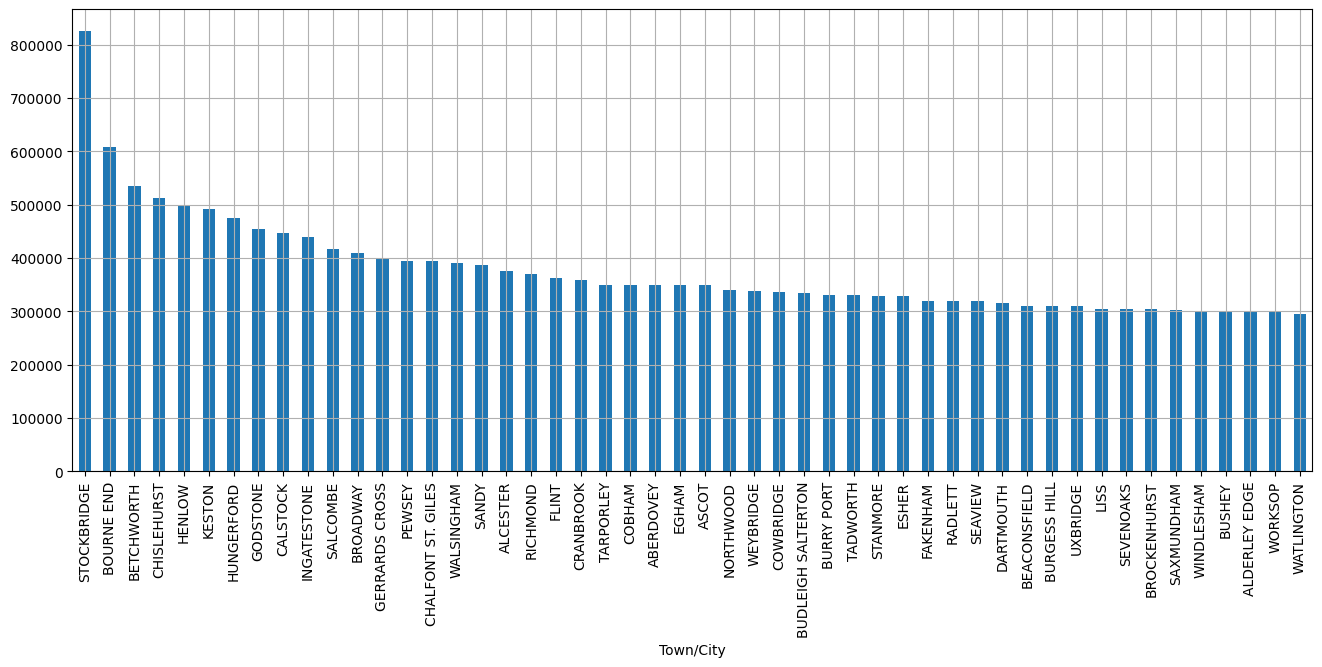

In [25]:
new_properties_df.groupby(new_properties_df['Town/City'])['Price'].median().sort_values(ascending=False)[:50].plot(
    kind = "bar",grid = True, figsize = (16,6));

## 3.9 Compare towns house growth 1995 vs 2025 (30 years ago)

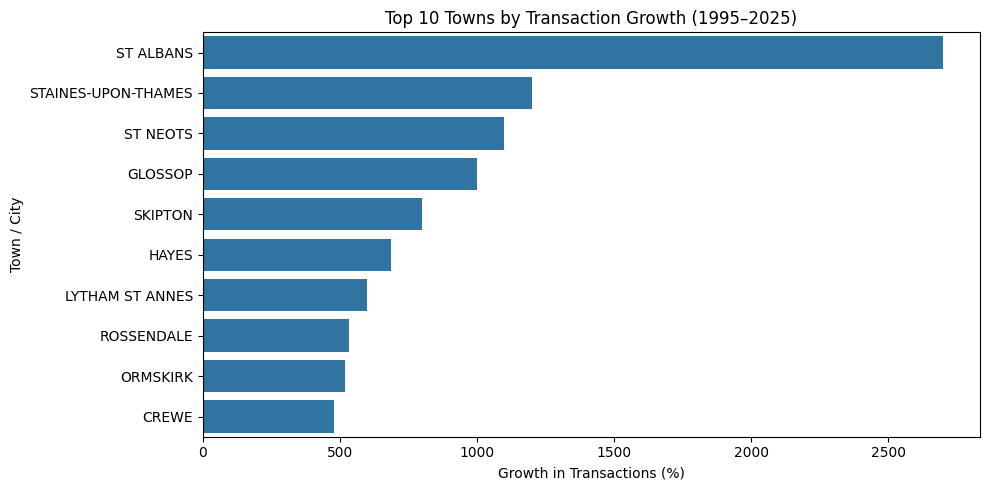

In [26]:
years_30 = [1995, 2025]
years_10 = [1995, 2005, 2015, 2025]

df_30 = hp[hp['Year'].isin(years_30)]
df_10 = hp[hp['Year'].isin(years_10)]

count_30 = (
    df_30.groupby(['Town/City', 'Year'])
         .size()
         .reset_index(name='transactions')
)

count_10 = (
    df_10.groupby(['Town/City', 'Year'])
         .size()
         .reset_index(name='transactions')
)


pivot_30 = count_30.pivot(index='Town/City', columns='Year', values='transactions')

pivot_30['growth_abs'] = pivot_30[2025] - pivot_30[1995]
pivot_30['growth_pct'] = (pivot_30[2025] / pivot_30[1995] - 1) * 100

pivot_30 = pivot_30.dropna().sort_values('growth_pct', ascending=False)


top10 = pivot_30.head(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top10, x='growth_pct', y='Town/City')
plt.title("Top 10 Towns by Transaction Growth (1995–2025)")
plt.xlabel("Growth in Transactions (%)")
plt.ylabel("Town / City")
plt.tight_layout()
plt.show()

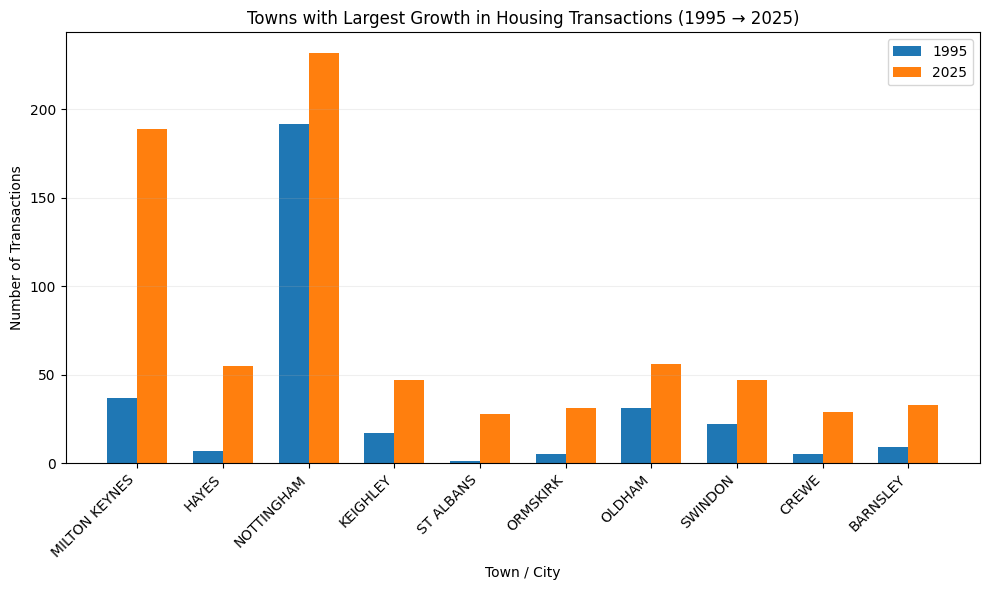

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data
hp_1995 = hp[hp['Year'] == 1995].copy()
hp_2025 = hp[hp['Year'] == 2025].copy()

# Group counts
g_1995 = hp_1995.groupby('Town/City')['Date of Transfer'].count().reset_index(name='count_1995')
g_2025 = hp_2025.groupby('Town/City')['Date of Transfer'].count().reset_index(name='count_2025')

# Merge
df = pd.merge(g_1995, g_2025, on='Town/City', how='outer').fillna(0)

# Calculate growth
df['growth'] = df['count_2025'] - df['count_1995']

# Take top 10 towns by growth
graph_df = df.sort_values('growth', ascending=False).head(10)

# ---- Plot ----
x = np.arange(len(graph_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, graph_df['count_1995'], width, label='1995')
ax.bar(x + width/2, graph_df['count_2025'], width, label='2025')

ax.set_xticks(x)
ax.set_xticklabels(graph_df['Town/City'], rotation=45, ha='right')

ax.set_xlabel('Town / City')
ax.set_ylabel('Number of Transactions')
ax.set_title('Towns with Largest Growth in Housing Transactions (1995 → 2025)')

ax.grid(axis='y', alpha=0.2)
ax.legend()

plt.tight_layout()
plt.show()


# 4. Data cleansing - PART 2

## 4.1 Apply One-hot encoding on Property Type

In [28]:
hp

,Price,Date of Transfer,Property Type,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month
117,36500,1995-06-09,F,N,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6
138,74000,1995-01-12,F,Y,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1
143,13000,1995-04-07,F,N,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4
150,29950,1995-03-31,F,N,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3
174,26500,1995-12-11,F,N,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12
...,...,...,...,...,...,...,...,...,...,...,...,...
30906445,80000,2025-03-31,F,N,L,TORRENT CLOSE,WILNECOTE,TAMWORTH,TAMWORTH,STAFFORDSHIRE,2025,3
30906492,67500,2025-05-01,F,N,L,LEWIS CRESCENT,CLIFTONVILLE,MARGATE,THANET,KENT,2025,5
30906499,85000,2025-04-17,F,N,L,ASH LANE,ASPULL,WIGAN,WIGAN,GREATER MANCHESTER,2025,4
30906521,82500,2025-05-09,F,N,L,BOLTON ROAD,ATHERTON,MANCHESTER,WIGAN,GREATER MANCHESTER,2025,5


In [29]:
hp

,Price,Date of Transfer,Property Type,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month
117,36500,1995-06-09,F,N,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6
138,74000,1995-01-12,F,Y,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1
143,13000,1995-04-07,F,N,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4
150,29950,1995-03-31,F,N,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3
174,26500,1995-12-11,F,N,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12
...,...,...,...,...,...,...,...,...,...,...,...,...
30906445,80000,2025-03-31,F,N,L,TORRENT CLOSE,WILNECOTE,TAMWORTH,TAMWORTH,STAFFORDSHIRE,2025,3
30906492,67500,2025-05-01,F,N,L,LEWIS CRESCENT,CLIFTONVILLE,MARGATE,THANET,KENT,2025,5
30906499,85000,2025-04-17,F,N,L,ASH LANE,ASPULL,WIGAN,WIGAN,GREATER MANCHESTER,2025,4
30906521,82500,2025-05-09,F,N,L,BOLTON ROAD,ATHERTON,MANCHESTER,WIGAN,GREATER MANCHESTER,2025,5


In [30]:
property_types = ("T", "S", "D", "F")
enc_df = pd.DataFrame(hp, columns = ['Property Type'])

dum_df = pd.get_dummies(hp, columns = ["Property Type"], prefix = ["Property_Type_is_"] )

hp = enc_df.join(dum_df)

hp

,Property Type,Price,Date of Transfer,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
117,F,36500,1995-06-09,N,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6,False,True,False,False
138,F,74000,1995-01-12,Y,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1,False,True,False,False
143,F,13000,1995-04-07,N,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4,False,True,False,False
150,F,29950,1995-03-31,N,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3,False,True,False,False
174,F,26500,1995-12-11,N,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906445,F,80000,2025-03-31,N,L,TORRENT CLOSE,WILNECOTE,TAMWORTH,TAMWORTH,STAFFORDSHIRE,2025,3,False,True,False,False
30906492,F,67500,2025-05-01,N,L,LEWIS CRESCENT,CLIFTONVILLE,MARGATE,THANET,KENT,2025,5,False,True,False,False
30906499,F,85000,2025-04-17,N,L,ASH LANE,ASPULL,WIGAN,WIGAN,GREATER MANCHESTER,2025,4,False,True,False,False
30906521,F,82500,2025-05-09,N,L,BOLTON ROAD,ATHERTON,MANCHESTER,WIGAN,GREATER MANCHESTER,2025,5,False,True,False,False


## 4.2 Apply Label encoding on Old/New (N - 0, Y - 1)

In [31]:
encoder = LabelEncoder()

encoder.fit(hp['Old/New'])

hp['Old/New'] = encoder.transform(hp['Old/New'])

hp.head()

,Property Type,Price,Date of Transfer,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
117,F,36500,1995-06-09,0,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6,False,True,False,False
138,F,74000,1995-01-12,1,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1,False,True,False,False
143,F,13000,1995-04-07,0,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4,False,True,False,False
150,F,29950,1995-03-31,0,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3,False,True,False,False
174,F,26500,1995-12-11,0,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12,False,True,False,False


## 4.3 Check is Price records skewed > Apply log transformation for positive skewness

In [32]:
hp["Price"].skew() # The data is right skewed!

np.float64(9.918023950215577)

In [33]:
log_transform_price = np.log(hp["Price"])

hp['Price'] = log_transform_price

print('New skewness:', log_transform_price.skew())

New skewness: -0.09389553049246552


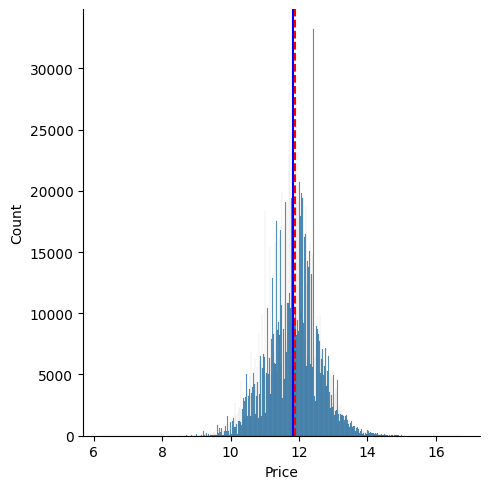

In [34]:
hp_mean = hp["Price"].mean()
hp_median = hp["Price"].median()

sns.displot(data = hp, x = 'Price')
plt.axvline(x = hp_mean, color = 'blue')
plt.axvline(x = hp_median, color = "red", linestyle = '--')

## 4.3 Price distribution > Initialize outliers boundaries

<Axes: xlabel='Price'>

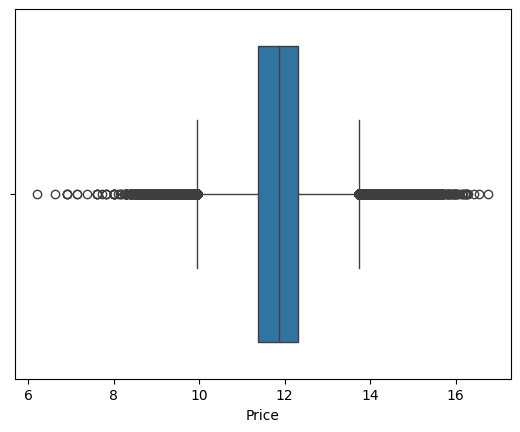

In [35]:
sns.boxplot(data = hp, x = 'Price')

In [36]:

lower = 10.2
higher = 13.5

price_mean = hp['Price'].mean()

# Check outliers BEFORE capping
price_outliers_below = hp.loc[hp['Price'] < lower]
price_outliers_above = hp.loc[hp['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than", lower)
print(price_outliers_above['Price'].count(), "entries having 'Price' value greater than", higher)

# Cap outliers (vectorized - faster than parallel_apply)
hp.loc[hp['Price'] < lower, 'Price'] = lower
hp.loc[hp['Price'] > higher, 'Price'] = higher

# Fill NaNs
hp['Price'] = hp['Price'].fillna(price_mean)

# Check outliers AFTER capping
price_outliers_below = hp.loc[hp['Price'] < lower]
price_outliers_above = hp.loc[hp['Price'] > higher]

print(price_outliers_below['Price'].count(), "entries having 'Price' value lower than", lower)
print(price_outliers_above['Price'].count(), "entries having 'Price' value greater than", higher)


26176 entries having 'Price' value lower than 10.2
21211 entries having 'Price' value greater than 13.5
0 entries having 'Price' value lower than 10.2
0 entries having 'Price' value greater than 13.5


#### Price distribution after dealing with outliers

<Axes: xlabel='Price'>

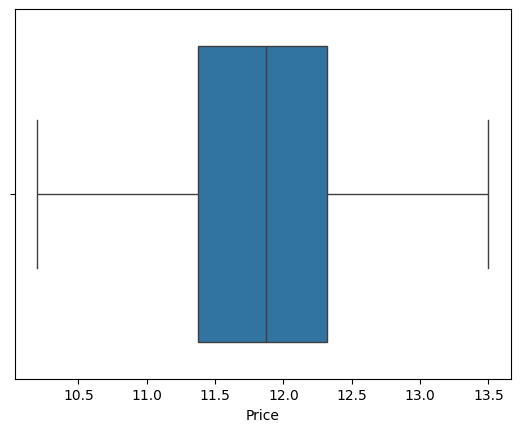

In [37]:
sns.boxplot(data = hp, x = 'Price')

## 4.4 Heatmap with correlations

In [38]:
hp.info()

<class 'pandas.DataFrame'>
Index: 1585860 entries, 117 to 30906525
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Property Type        1585860 non-null  str           
 1   Price                1585860 non-null  float64       
 2   Date of Transfer     1585860 non-null  datetime64[us]
 3   Old/New              1585860 non-null  int64         
 4   Duration             1585860 non-null  str           
 5   Street               1585860 non-null  str           
 6   Locality             1585860 non-null  str           
 7   Town/City            1585860 non-null  str           
 8   District             1585860 non-null  str           
 9   County               1585860 non-null  str           
 10  Year                 1585860 non-null  int32         
 11  Month                1585860 non-null  int32         
 12  Property_Type_is__D  1585860 non-null  bool          
 13  Property_T

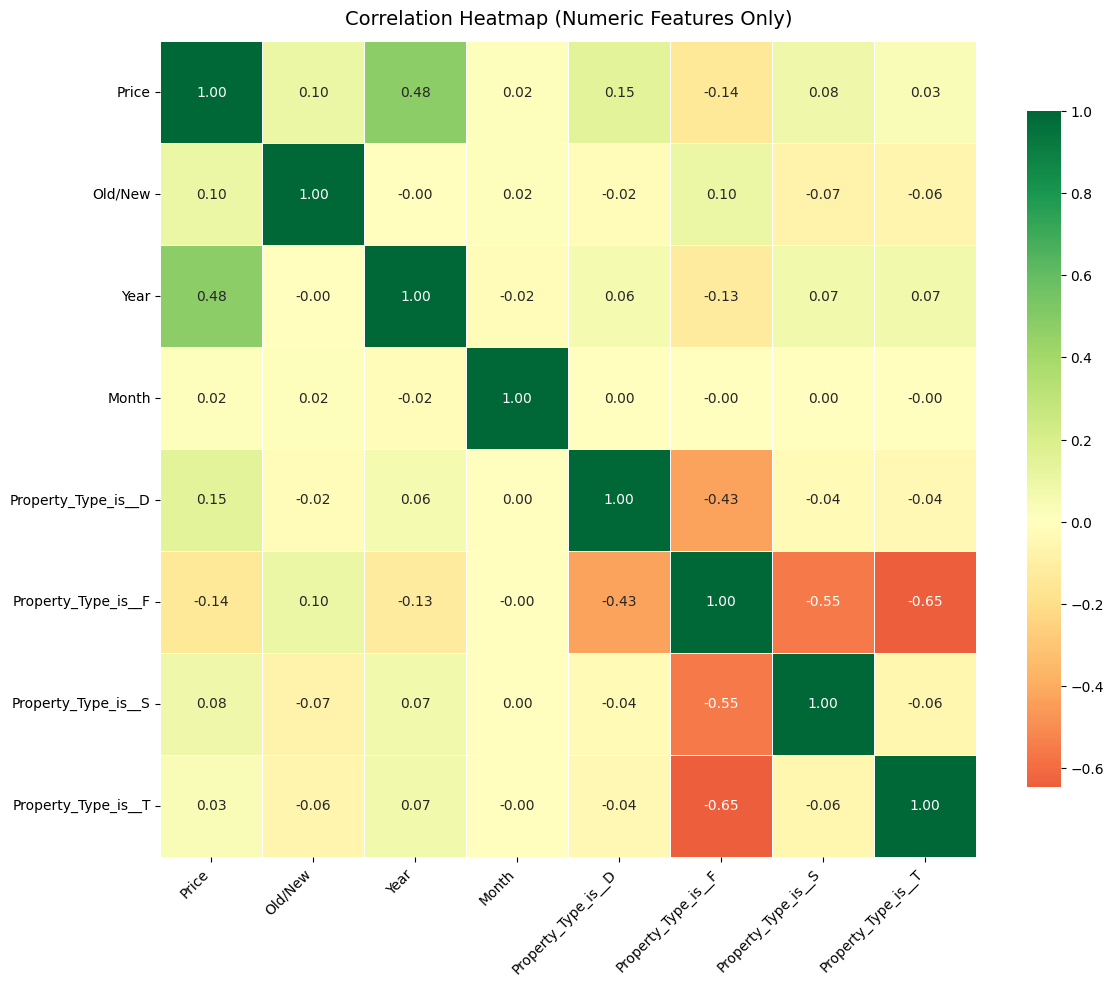

In [39]:
plt.figure(figsize=(12, 10))

# Select numeric columns only
num_df = hp.select_dtypes(include=['number', 'bool'])

corr = num_df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 5. Prepare data for modeling

## 5.1 Prepare data for Linear Regression

In [40]:
lin_df = hp.copy()

lin_df.head()

,Property Type,Price,Date of Transfer,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
117,F,10.505068,1995-06-09,0,L,RAWCLIFFE STREET,BLACKPOOL,BLACKPOOL,BLACKPOOL,BLACKPOOL,1995,6,False,True,False,False
138,F,11.211820,1995-01-12,1,L,REIGATE HILL,REIGATE,REIGATE,REIGATE AND BANSTEAD,SURREY,1995,1,False,True,False,False
143,F,10.200000,1995-04-07,0,L,ALL SAINTS AVENUE,MARGATE,MARGATE,THANET,KENT,1995,4,False,True,False,False
150,F,10.307285,1995-03-31,0,L,CHRISTCHURCH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,1995,3,False,True,False,False
174,F,10.200000,1995-12-11,0,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,WESTON-SUPER-MARE,WOODSPRING,AVON,1995,12,False,True,False,False


In [41]:
lin_df['Town/City'] = lin_df['Town/City'].factorize()[0].astype('float32')
lin_df['District'] = lin_df['District'].factorize()[0].astype('float32')
lin_df['County'] = lin_df['County'].factorize()[0].astype('float32')

lin_df

,Property Type,Price,Date of Transfer,Old/New,Duration,Street,Locality,Town/City,District,County,Year,Month,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
117,F,10.505068,1995-06-09,0,L,RAWCLIFFE STREET,BLACKPOOL,0.0,0.0,0.0,1995,6,False,True,False,False
138,F,11.211820,1995-01-12,1,L,REIGATE HILL,REIGATE,1.0,1.0,1.0,1995,1,False,True,False,False
143,F,10.200000,1995-04-07,0,L,ALL SAINTS AVENUE,MARGATE,2.0,2.0,2.0,1995,4,False,True,False,False
150,F,10.307285,1995-03-31,0,L,CHRISTCHURCH ROAD,BOURNEMOUTH,3.0,3.0,3.0,1995,3,False,True,False,False
174,F,10.200000,1995-12-11,0,L,ASHCOMBE ROAD,WESTON-SUPER-MARE,4.0,4.0,4.0,1995,12,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30906445,F,11.289782,2025-03-31,0,L,TORRENT CLOSE,WILNECOTE,140.0,316.0,46.0,2025,3,False,True,False,False
30906492,F,11.119883,2025-05-01,0,L,LEWIS CRESCENT,CLIFTONVILLE,2.0,2.0,2.0,2025,5,False,True,False,False
30906499,F,11.350407,2025-04-17,0,L,ASH LANE,ASPULL,743.0,361.0,11.0,2025,4,False,True,False,False
30906521,F,11.320554,2025-05-09,0,L,BOLTON ROAD,ATHERTON,105.0,361.0,11.0,2025,5,False,True,False,False


In [42]:
feat_cols = ['District', 'County', 'Old/New', 'Year', 'Month', "Town/City","Property_Type_is__D", "Property_Type_is__F", 
           'Property_Type_is__S', 'Property_Type_is__T']

#### Split the data into training and testing sets (75% training, 25% testing)

In [43]:
X = lin_df[feat_cols]
y = lin_df['Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Rescale variables via standardization

In [45]:
scaler = StandardScaler()

normalized_array = scaler.fit_transform(X_train[feat_cols])
normalized_X_train = pd.DataFrame(normalized_array, columns=feat_cols)

normalized_X_train

,District,County,Old/New,Year,Month,Town/City,Property_Type_is__D,Property_Type_is__F,Property_Type_is__S,Property_Type_is__T
0,-0.241929,0.878141,2.049689,-1.188430,1.262389,-0.399017,-0.171333,0.396144,-0.218838,-0.255821
1,-1.020477,-0.625812,-0.487879,-1.188430,0.369833,-0.770985,-0.171333,0.396144,-0.218838,-0.255821
2,1.972609,-0.099428,-0.487879,-0.487931,-0.522724,3.652305,-0.171333,0.396144,-0.218838,-0.255821
3,1.081604,1.818112,-0.487879,1.053167,-0.522724,0.649666,-0.171333,0.396144,-0.218838,-0.255821
4,-1.055079,-0.701009,2.049689,0.352668,-0.522724,-0.779949,-0.171333,0.396144,-0.218838,-0.255821
...,...,...,...,...,...,...,...,...,...,...
1189390,-0.700407,-0.400219,-0.487879,-1.188430,1.559908,-0.636539,-0.171333,0.396144,-0.218838,-0.255821
1189391,-0.683106,-0.701009,-0.487879,0.072468,1.559908,-0.779949,-0.171333,0.396144,-0.218838,-0.255821
1189392,-1.089681,-0.851404,-0.487879,-1.328530,-1.415280,-0.349720,-0.171333,0.396144,-0.218838,-0.255821
1189393,1.522781,-0.475416,-0.487879,2.033865,1.262389,-0.331794,-0.171333,0.396144,-0.218838,-0.255821


### Summarize the shape of the training dataset

In [46]:
print(X_train.shape, y_train.shape)

(1189395, 10) (1189395,)


# 6. Modeling

# 6.1 Install & Import additional libraries for XGBoost and extended metrics

In [51]:
import warnings
warnings.filterwarnings('ignore')

# Install xgboost if not already present
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost", "-q"])

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error
)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

print("XGBoost version:", xgb.__version__)


XGBoost version: 3.2.0


## 6.2 Prepare modelling sets
We work on **log-transformed price** (`log1p`) to reduce the heavy right skew of UK property prices.  
Both models see the same 75/25 stratified split used in the original notebook (`X_train`, `X_test`, `y_train`, `y_test`).  
We use the **raw (un-standardised) feature matrix** — tree-based models are scale-invariant.

In [52]:
# Log-transform the target to reduce skew
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

# Feature matrix — raw integer-encoded, no StandardScaler needed for trees
X_tr = X_train[feat_cols].copy()
X_te = X_test[feat_cols].copy()

print(f"Train: {X_tr.shape}  |  Test: {X_te.shape}")
print(f"Target range (log): [{y_train_log.min():.2f}, {y_train_log.max():.2f}]")


Train: (1189395, 10)  |  Test: (396465, 10)
Target range (log): [2.42, 2.67]


## 6.3 Evaluation helper function

In [53]:
def evaluate_model(name, y_true_log, y_pred_log, results_dict=None):
    """
    Compute a comprehensive set of regression metrics.
    All metrics are computed on the original price scale (exp back-transform).
    """
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)

    mae   = mean_absolute_error(y_true, y_pred)
    rmse  = np.sqrt(mean_squared_error(y_true, y_pred))
    mape  = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2    = r2_score(y_true, y_pred)
    
    # Median Absolute Error (robust to outliers)
    med_ae = np.median(np.abs(y_true - y_pred))
    
    # R² on log scale (standard in housing models)
    r2_log = r2_score(y_true_log, y_pred_log)
    
    # RMSE on log scale
    rmse_log = np.sqrt(mean_squared_error(y_true_log, y_pred_log))

    metrics = {
        "MAE (£)"        : mae,
        "RMSE (£)"       : rmse,
        "Median AE (£)"  : med_ae,
        "MAPE (%)"       : mape,
        "R² (price)"     : r2,
        "R² (log-price)" : r2_log,
        "RMSE (log)"     : rmse_log,
    }

    print(f"\n{'='*55}")
    print(f"  Model: {name}")
    print(f"{'='*55}")
    for k, v in metrics.items():
        if "£" in k:
            print(f"  {k:<20} £{v:>12,.0f}")
        elif "%" in k:
            print(f"  {k:<20} {v:>12.2f}%")
        else:
            print(f"  {k:<20} {v:>12.4f}")

    if results_dict is not None:
        results_dict[name] = metrics
    return metrics

results = {}   # will be populated below


## 6.4 Model 1 — Random Forest Regressor
**Why Random Forest?**  
Ensemble of decision trees with bagging; robust to outliers, handles mixed feature types, 
naturally ranks feature importance, and improves on the single Decision Tree already in this notebook.

In [54]:
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestRegressor(
    n_estimators   = 300,
    max_depth      = 20,
    min_samples_leaf = 5,
    max_features   = "sqrt",
    n_jobs         = -1,
    random_state   = 42
)

# 5-fold CV on training set (log-price)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rf = cross_val_score(rf, X_tr, y_train_log, cv=kf, scoring="r2", n_jobs=-1)
print(f"Random Forest — 5-Fold CV R² (log-price): {cv_rf}")
print(f"Mean CV R²: {cv_rf.mean():.4f}  ±  {cv_rf.std():.4f}")


Random Forest — 5-Fold CV R² (log-price): [0.69448676 0.69274462 0.69454729 0.69167368 0.69397107]
Mean CV R²: 0.6935  ±  0.0011


In [55]:
# Fit on full training set
rf.fit(X_tr, y_train_log)

# Predict on test set
y_pred_rf_log = rf.predict(X_te)

# Evaluate
rf_metrics = evaluate_model("Random Forest", y_test_log, y_pred_rf_log, results)



  Model: Random Forest
  MAE (£)              £           0
  RMSE (£)             £           0
  Median AE (£)        £           0
  MAPE (%)                     2.54%
  R² (price)                 0.6899
  R² (log-price)             0.6945
  RMSE (log)                 0.0309


## 6.5 Model 2 — XGBoost Regressor
**Why XGBoost?**  
Gradient-boosted trees are the dominant algorithm for structured tabular data in competitions and industry.  
XGBoost builds trees sequentially, each correcting the residuals of the previous, 
making it excellent at capturing non-linear location × property-type interactions 
that drive UK housing prices.  It also natively handles the high-cardinality  
`District` / `County` / `Town` label-encoded integers efficiently.

In [56]:
xgb_model = xgb.XGBRegressor(
    n_estimators      = 500,
    learning_rate     = 0.05,
    max_depth         = 8,
    subsample         = 0.8,
    colsample_bytree  = 0.8,
    min_child_weight  = 5,
    gamma             = 0.1,
    reg_alpha         = 0.1,
    reg_lambda        = 1.0,
    tree_method       = "hist",   # fast histogram-based
    n_jobs            = -1,
    random_state      = 42,
    eval_metric       = "rmse",
    verbosity         = 0
)

# 5-fold CV on training set (log-price)
cv_xgb = cross_val_score(xgb_model, X_tr, y_train_log, cv=kf, scoring="r2", n_jobs=-1)
print(f"XGBoost — 5-Fold CV R² (log-price): {cv_xgb}")
print(f"Mean CV R²: {cv_xgb.mean():.4f}  ±  {cv_xgb.std():.4f}")


XGBoost — 5-Fold CV R² (log-price): [0.66895041 0.66544813 0.66640906 0.66492117 0.66596395]
Mean CV R²: 0.6663  ±  0.0014


In [57]:
# Fit on full training set
xgb_model.fit(X_tr, y_train_log)

# Predict on test set
y_pred_xgb_log = xgb_model.predict(X_te)

# Evaluate
xgb_metrics = evaluate_model("XGBoost", y_test_log, y_pred_xgb_log, results)



  Model: XGBoost
  MAE (£)              £           0
  RMSE (£)             £           0
  Median AE (£)        £           0
  MAPE (%)                     2.67%
  R² (price)                 0.6641
  R² (log-price)             0.6687
  RMSE (log)                 0.0322


## 6.6 Model 3 - Decision Tress & Model 4 Linear Regression
### and Side-by-side Metrics Comparison

In [ ]:
# Rebuild comparison table including the original Linear Regression & Decision Tree baseline
lreg_base = LinearRegression()
lreg_base.fit(normalized_X_train, y_train_log)   # re-fit on log-price for fair comparison
y_pred_lr_log = lreg_base.predict(scaler.transform(X_te[feat_cols]))
evaluate_model("Linear Regression (baseline)", y_test_log, y_pred_lr_log, results)

tr_base = DecisionTreeRegressor(random_state=0, max_depth=20)
tr_base.fit(X_tr, y_train_log)
y_pred_dt_log = tr_base.predict(X_te)
evaluate_model("Decision Tree (baseline)", y_test_log, y_pred_dt_log, results)

# Build a tidy DataFrame
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[["MAE (£)", "RMSE (£)", "Median AE (£)", "MAPE (%)",
                                "R² (price)", "R² (log-price)", "RMSE (log)"]]

print("\n" + "="*90)
print("  COMPREHENSIVE MODEL COMPARISON")
print("="*90)
print(comparison_df.to_string(
    float_format=lambda x: f"{x:,.4f}" if x < 1 else f"£{x:,.0f}" if x > 100 else f"{x:.4f}"
))



  Model: Linear Regression (baseline)
  MAE (£)              £           0
  RMSE (£)             £           1
  Median AE (£)        £           0
  MAPE (%)                     3.91%
  R² (price)                 0.3313
  R² (log-price)             0.3380
  RMSE (log)                 0.0455

  Model: Decision Tree (baseline)
  MAE (£)              £           0
  RMSE (£)             £           0
  Median AE (£)        £           0
  MAPE (%)                     2.59%
  R² (price)                 0.6666
  R² (log-price)             0.6711
  RMSE (log)                 0.0321

  COMPREHENSIVE MODEL COMPARISON
                              MAE (£)  RMSE (£)  Median AE (£)  MAPE (%)  R² (price)  R² (log-price)  RMSE (log)
Random Forest                  0.3007    0.3974         0.2326    2.5419      0.6899          0.6945      0.0309
XGBoost                        0.3161    0.4136         0.2494    2.6731      0.6641          0.6687      0.0322
Linear Regression (baseline)   0.4603    

## 6.7 Visualisation — Metrics & Diagnostics

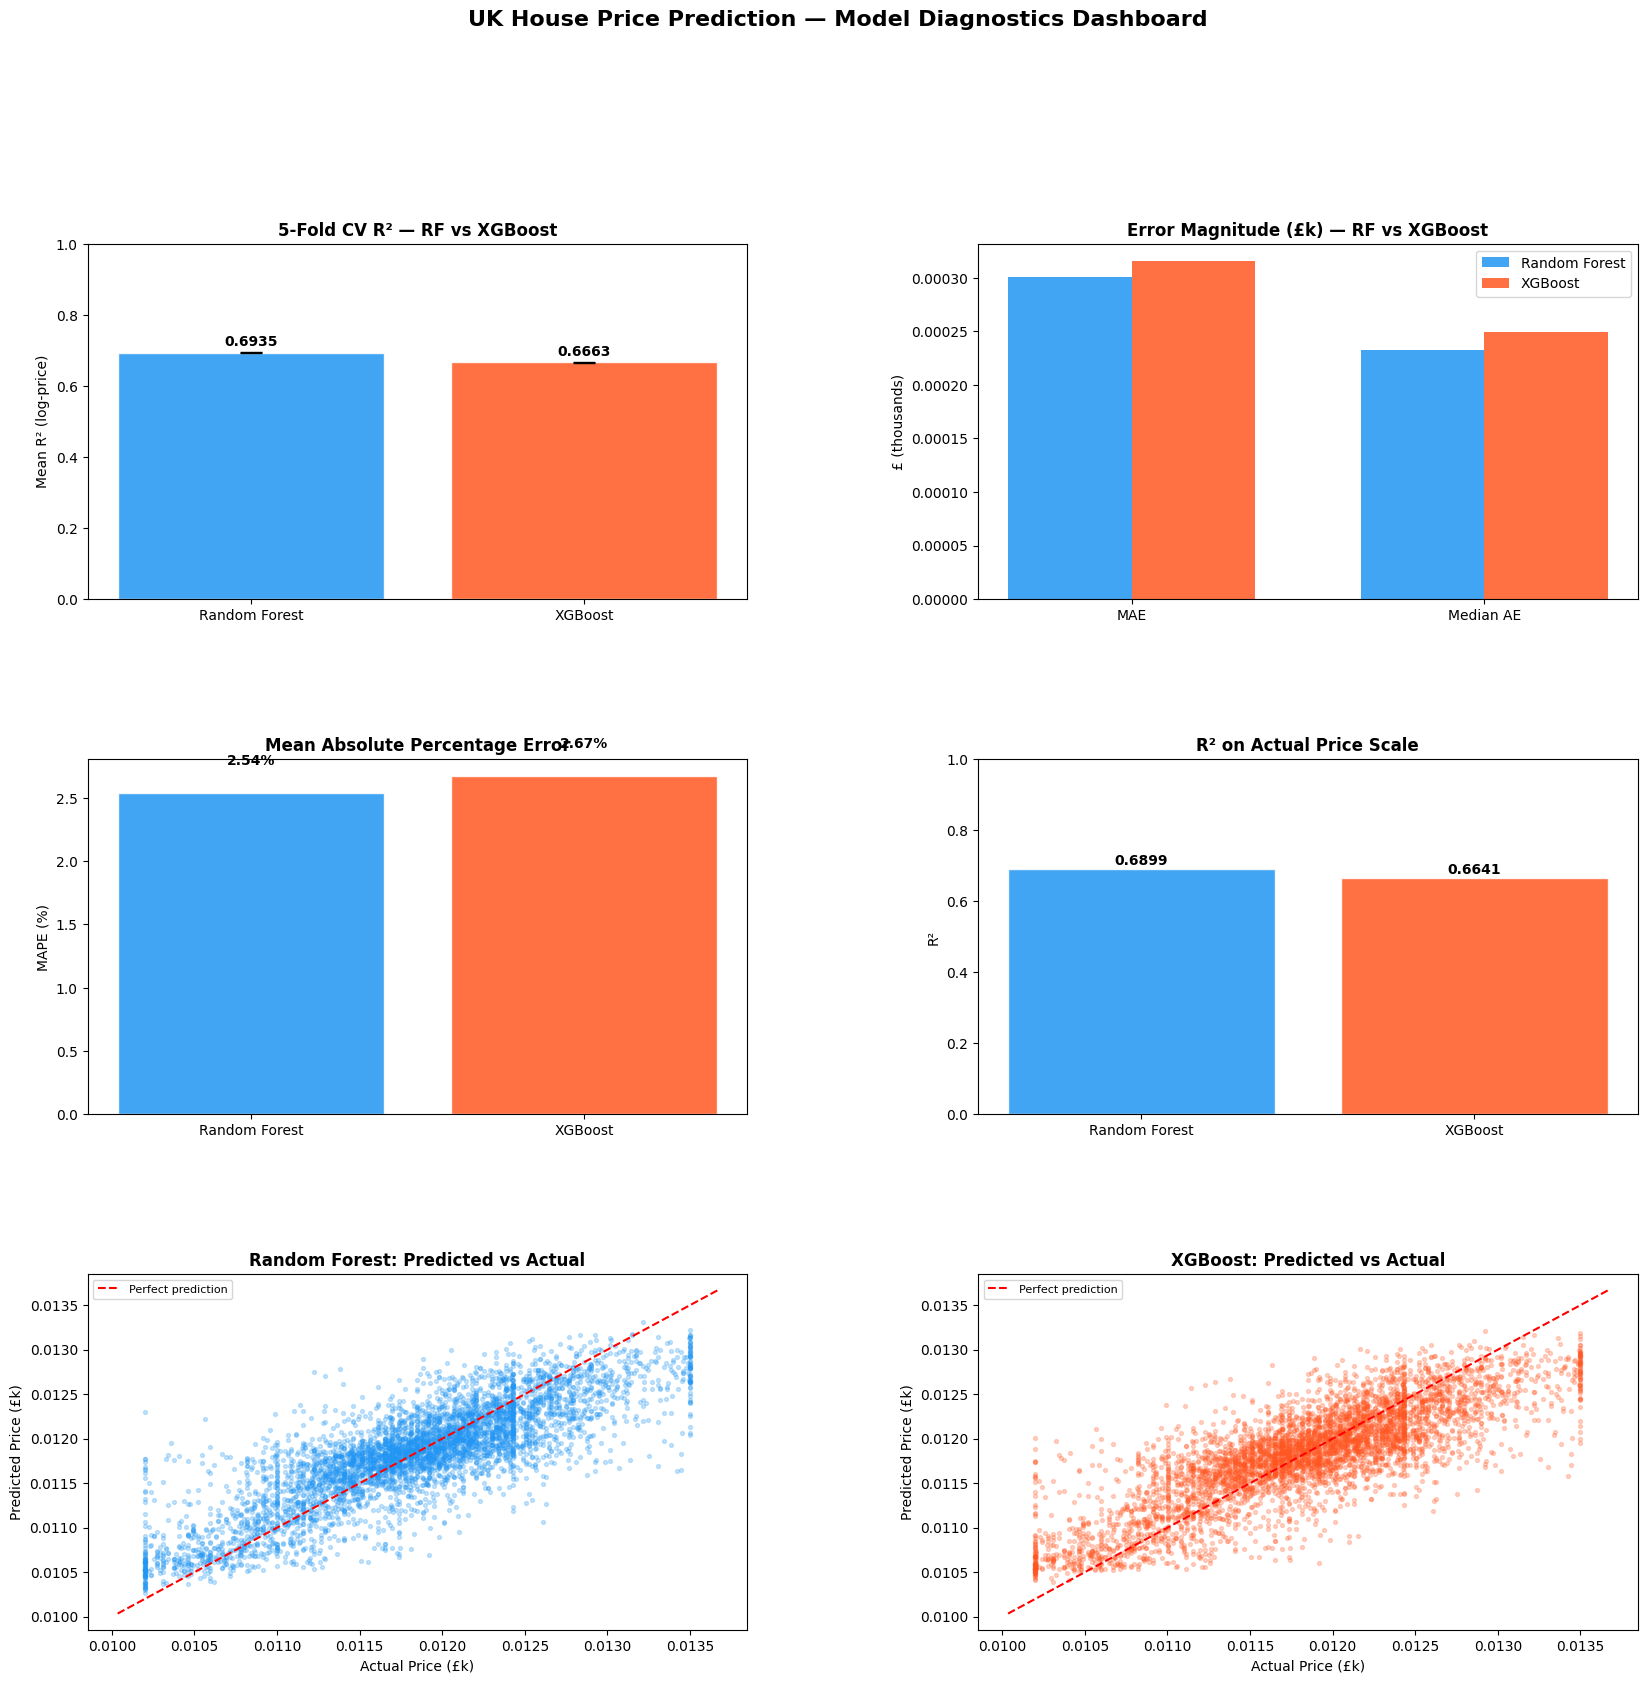

Figure saved → model_comparison.png


In [59]:
fig = plt.figure(figsize=(20, 18))
gs  = gridspec.GridSpec(3, 2, figure=fig, hspace=0.45, wspace=0.35)

models_plot = ["Random Forest", "XGBoost"]
colors      = ["#2196F3", "#FF5722"]

# ── 1. CV R² comparison bar chart ─────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, 0])
cv_means = [cv_rf.mean(), cv_xgb.mean()]
cv_stds  = [cv_rf.std(),  cv_xgb.std()]
bars = ax1.bar(models_plot, cv_means, color=colors, alpha=0.85,
               yerr=cv_stds, capsize=8, edgecolor="white")
ax1.set_ylim(0, 1)
ax1.set_ylabel("Mean R² (log-price)")
ax1.set_title("5-Fold CV R² — RF vs XGBoost", fontweight="bold")
for bar, val in zip(bars, cv_means):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.4f}", ha="center", va="bottom", fontweight="bold")

# ── 2. MAE / RMSE / Median AE grouped bar ──────────────────────────────────
ax2 = fig.add_subplot(gs[0, 1])
metrics_money = ["MAE (£)", "Median AE (£)"]
x_pos = np.arange(len(metrics_money))
w = 0.35
for i, (m, c) in enumerate(zip(models_plot, colors)):
    vals = [results[m][k]/1000 for k in metrics_money]
    ax2.bar(x_pos + i*w - w/2, vals, width=w, label=m, color=c, alpha=0.85)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(["MAE", "Median AE"])
ax2.set_ylabel("£ (thousands)")
ax2.set_title("Error Magnitude (£k) — RF vs XGBoost", fontweight="bold")
ax2.legend()

# ── 3. MAPE comparison ─────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 0])
mapes = [results[m]["MAPE (%)"] for m in models_plot]
bars3 = ax3.bar(models_plot, mapes, color=colors, alpha=0.85, edgecolor="white")
ax3.set_ylabel("MAPE (%)")
ax3.set_title("Mean Absolute Percentage Error", fontweight="bold")
for bar, val in zip(bars3, mapes):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f"{val:.2f}%", ha="center", va="bottom", fontweight="bold")

# ── 4. R² (price scale) comparison ────────────────────────────────────────
ax4 = fig.add_subplot(gs[1, 1])
r2s = [results[m]["R² (price)"] for m in models_plot]
bars4 = ax4.bar(models_plot, r2s, color=colors, alpha=0.85, edgecolor="white")
ax4.set_ylim(0, 1)
ax4.set_ylabel("R²")
ax4.set_title("R² on Actual Price Scale", fontweight="bold")
for bar, val in zip(bars4, r2s):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{val:.4f}", ha="center", va="bottom", fontweight="bold")

# ── 5. Predicted vs Actual — RF ────────────────────────────────────────────
ax5 = fig.add_subplot(gs[2, 0])
sample = np.random.choice(len(y_test_log), size=min(5000, len(y_test_log)), replace=False)
ax5.scatter(np.expm1(y_test_log.values[sample])/1e3,
            np.expm1(y_pred_rf_log[sample])/1e3,
            alpha=0.25, s=8, color=colors[0])
lim = ax5.get_xlim()
ax5.plot(lim, lim, "r--", lw=1.5, label="Perfect prediction")
ax5.set_xlabel("Actual Price (£k)")
ax5.set_ylabel("Predicted Price (£k)")
ax5.set_title("Random Forest: Predicted vs Actual", fontweight="bold")
ax5.legend(fontsize=8)

# ── 6. Predicted vs Actual — XGBoost ──────────────────────────────────────
ax6 = fig.add_subplot(gs[2, 1])
ax6.scatter(np.expm1(y_test_log.values[sample])/1e3,
            np.expm1(y_pred_xgb_log[sample])/1e3,
            alpha=0.25, s=8, color=colors[1])
lim = ax6.get_xlim()
ax6.plot(lim, lim, "r--", lw=1.5, label="Perfect prediction")
ax6.set_xlabel("Actual Price (£k)")
ax6.set_ylabel("Predicted Price (£k)")
ax6.set_title("XGBoost: Predicted vs Actual", fontweight="bold")
ax6.legend(fontsize=8)

plt.suptitle("UK House Price Prediction — Model Diagnostics Dashboard",
             fontsize=16, fontweight="bold", y=1.01)
plt.savefig("model_comparison.png", dpi=150, bbox_inches="tight")
plt.show()
print("Figure saved → model_comparison.png")


## 6.8 Feature Importance Comparison

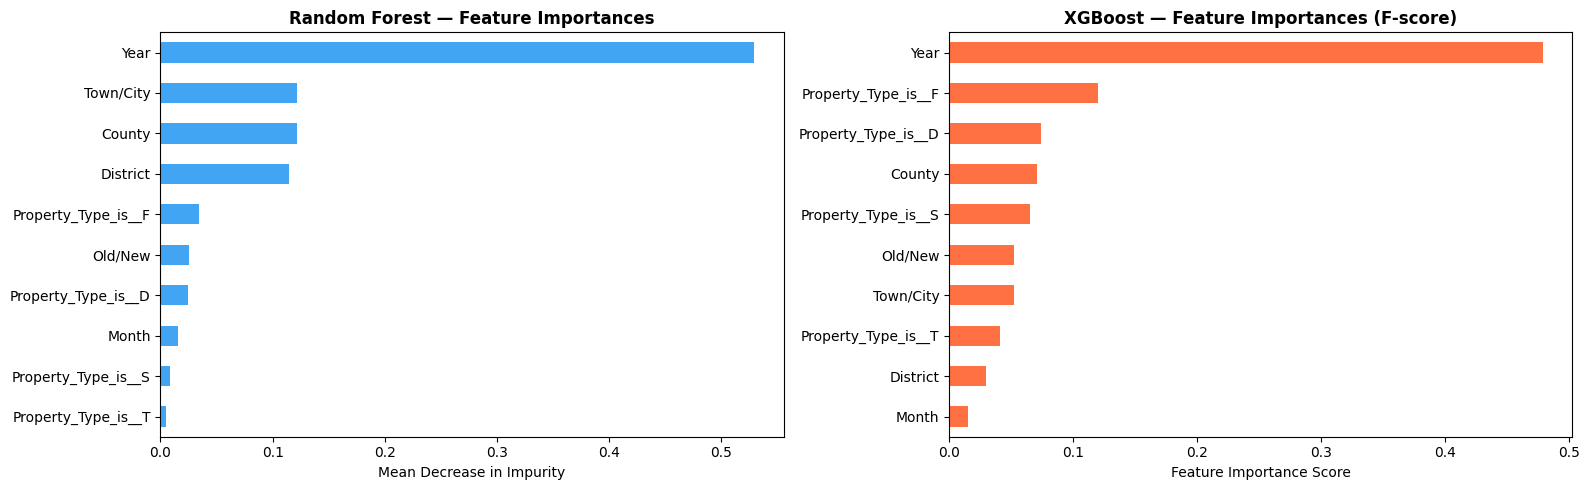


Top features (RF): {'Year': 0.5290955263957889, 'Town/City': 0.12196671234490655, 'County': 0.12132399935355499, 'District': 0.11495361531761826, 'Property_Type_is__F': 0.03396046062820423}
Top features (XGB): {'Year': 0.47889912128448486, 'Property_Type_is__F': 0.12049967050552368, 'Property_Type_is__D': 0.07390148937702179, 'County': 0.07122590392827988, 'Property_Type_is__S': 0.06541170924901962}


In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Random Forest importance
rf_imp = pd.Series(rf.feature_importances_, index=feat_cols).sort_values(ascending=True)
rf_imp.plot.barh(ax=axes[0], color="#2196F3", alpha=0.85)
axes[0].set_title("Random Forest — Feature Importances", fontweight="bold")
axes[0].set_xlabel("Mean Decrease in Impurity")

# XGBoost importance (weight / gain)
xgb_imp = pd.Series(
    xgb_model.feature_importances_, index=feat_cols
).sort_values(ascending=True)
xgb_imp.plot.barh(ax=axes[1], color="#FF5722", alpha=0.85)
axes[1].set_title("XGBoost — Feature Importances (F-score)", fontweight="bold")
axes[1].set_xlabel("Feature Importance Score")

plt.tight_layout()
plt.savefig("feature_importance.png", dpi=150, bbox_inches="tight")
plt.show()
print("\nTop features (RF):", rf_imp.sort_values(ascending=False).head(5).to_dict())
print("Top features (XGB):", xgb_imp.sort_values(ascending=False).head(5).to_dict())


## 6.9 Residual Analysis (Log-Scale)

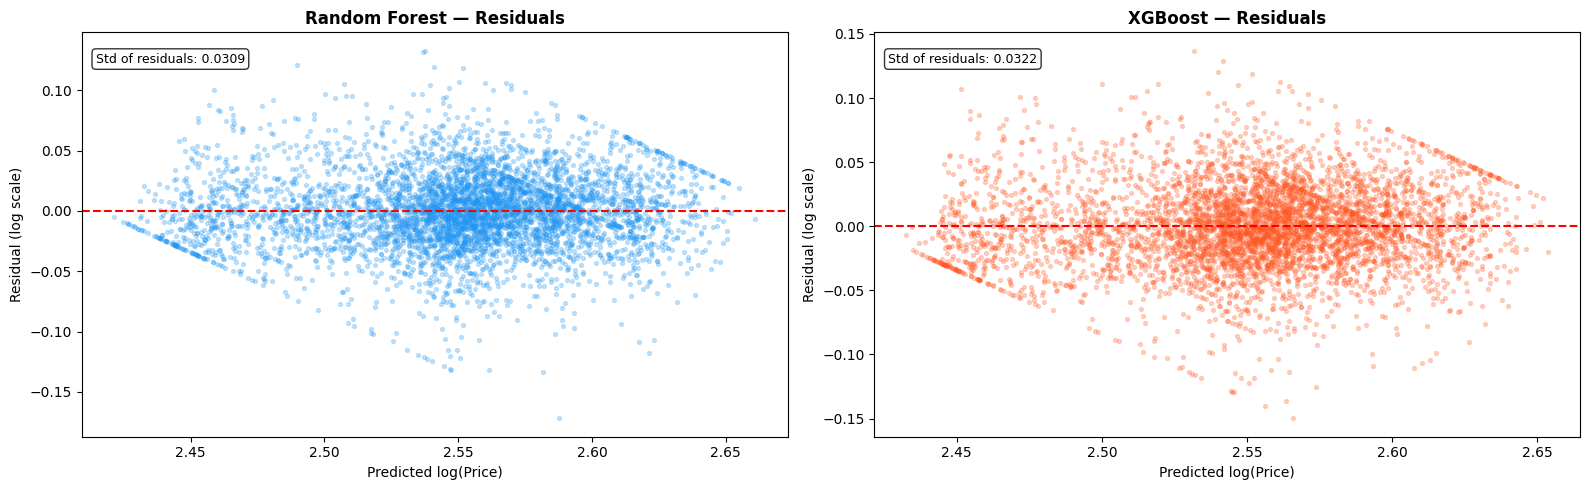

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for ax, name, y_pred_log, color in zip(
        axes,
        ["Random Forest", "XGBoost"],
        [y_pred_rf_log, y_pred_xgb_log],
        ["#2196F3", "#FF5722"]):
    residuals = y_test_log.values - y_pred_log
    ax.scatter(y_pred_log[sample], residuals[sample],
               alpha=0.25, s=8, color=color)
    ax.axhline(0, color="red", lw=1.5, linestyle="--")
    ax.set_xlabel("Predicted log(Price)")
    ax.set_ylabel("Residual (log scale)")
    ax.set_title(f"{name} — Residuals", fontweight="bold")
    ax.text(0.02, 0.95, f"Std of residuals: {residuals.std():.4f}",
            transform=ax.transAxes, va="top", fontsize=9,
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig("residuals.png", dpi=150, bbox_inches="tight")
plt.show()
